In [2]:
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/94178964 [00:00<?, ?it/s]

DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.


  0%|          | 0/58758994 [00:00<?, ?it/s]

In [4]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [93]:
ktp_path1= os.path.join('ktp', '1.jpeg')
muka_path1= os.path.join('muka', '1.jpg')
ktp_read1 =cv2.imread(ktp_path1)
muka_read1=cv2.imread(muka_path1)

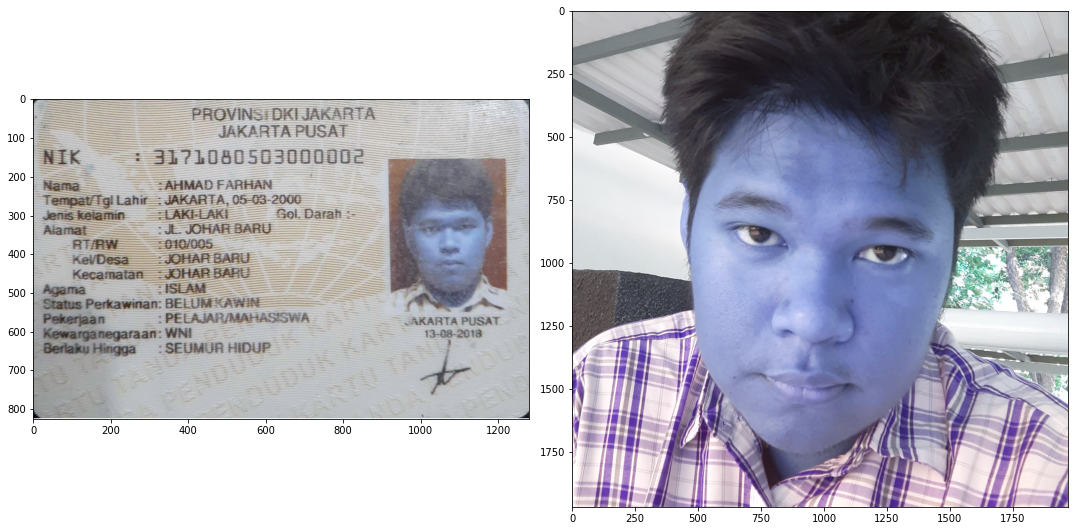

In [94]:
plt.rcParams["figure.figsize"] = [30, 45]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 4, 1)
plt.imshow(ktp_read1, cmap="Blues_r")
plt.subplot(1, 4, 2)
plt.imshow(muka_read1, cmap="Accent_r")

In [98]:
ktp_path2= os.path.join('ktp', '2.jpeg')
muka_path2= os.path.join('muka', '2.png')
ktp_read2 =cv2.imread(ktp_path2)
muka_read2=cv2.imread(muka_path2)

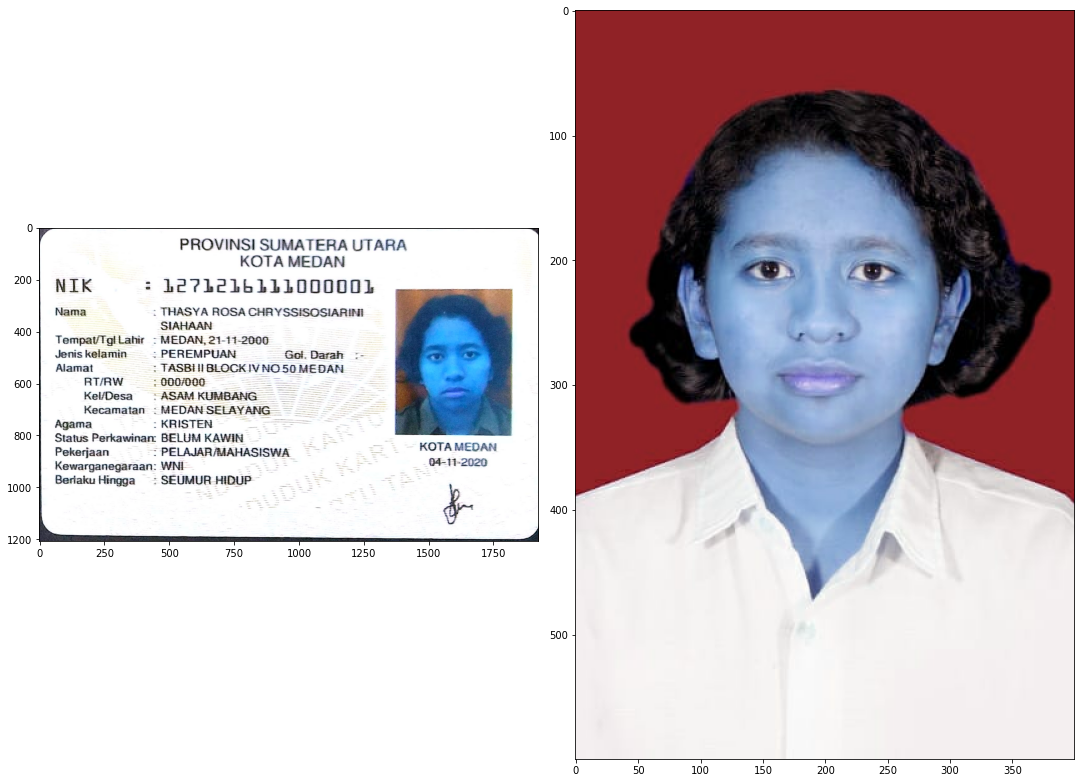

In [99]:
plt.rcParams["figure.figsize"] = [30, 45]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 4, 1)
plt.imshow(ktp_read2, cmap="Blues_r")
plt.subplot(1, 4, 2)
plt.imshow(muka_read2, cmap="Accent_r")

In [101]:
ktp_path3= os.path.join('ktp', '3.jpeg')
muka_path3= os.path.join('muka', '3.jpeg')
ktp_read3 =cv2.imread(ktp_path)
muka_read3=cv2.imread(muka_path)

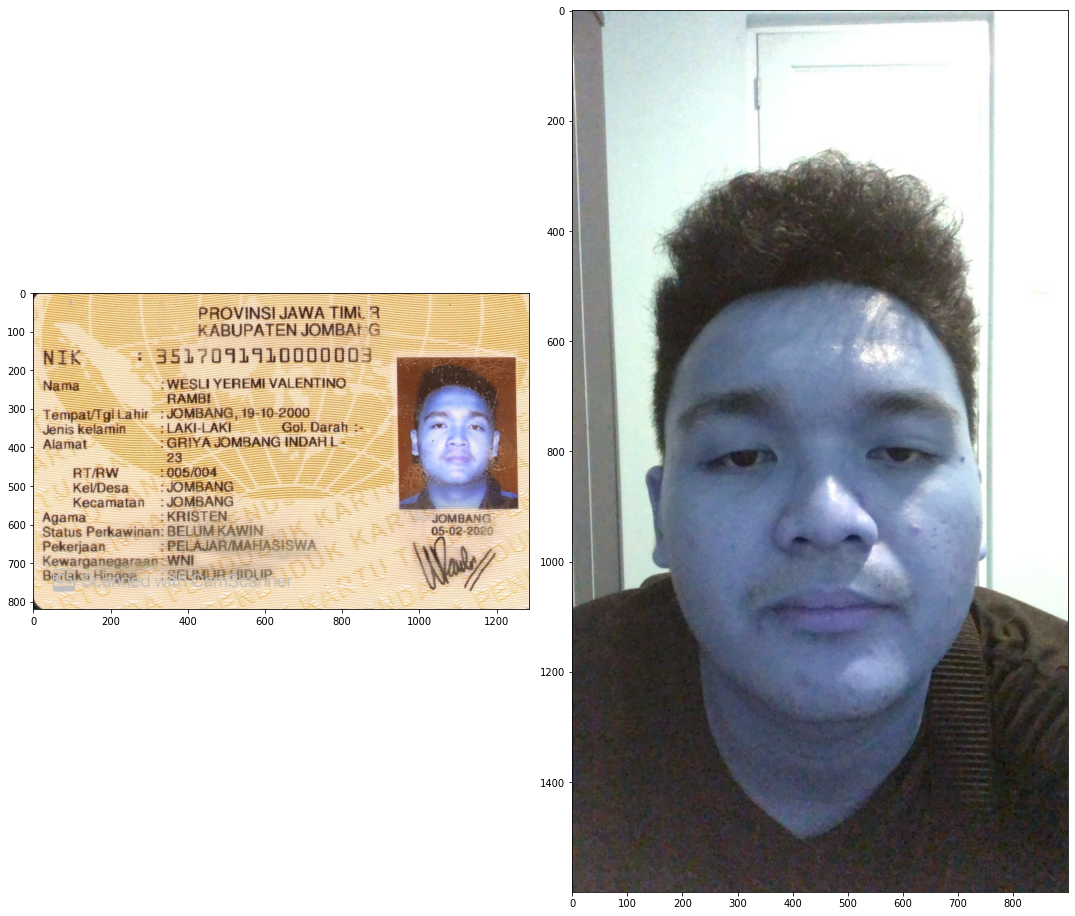

In [102]:
plt.rcParams["figure.figsize"] = [30, 45]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 4, 1)
plt.imshow(ktp_read, cmap="Blues_r")
plt.subplot(1, 4, 2)
plt.imshow(muka_read, cmap="Accent_r")

In [103]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import re

def extract_nik(img_path):
    '''return NIK in str'''
    doc = DocumentFile.from_images(img_path)
    result = model(doc)
    nik = result.render().split('\n')
    while '' in nik:
        nik.remove('')
    for i in nik:
        if re.search('^\d*$', i): #regex to choose NIK format
            return i

In [104]:
print(extract_nik(ktp_path1))
print(extract_nik(ktp_path2))
print(extract_nik(ktp_path3))

3171080503000002
1271216111000001
3517091910000003


In [79]:
from deepface import DeepFace

In [80]:
#verifiying the face
def verify(id, face):
    '''
    this function takes in id card images, and perosn to be verified images, it will return True if the 
    face of the user match their id
    '''
    backend = 'retinaface'
    model = 'Facenet'
    dm = 'euclidean_l2'
    result = DeepFace.verify(img1_path = id, img2_path = face, model_name = model , detector_backend = backend, distance_metric = dm)
    return result['verified']

In [89]:
os.listdir('muka')

['1.jpg', '2.png', '3.jpeg']

In [105]:
print(verify(ktp_path1, muka_path1))
print(verify(ktp_path2, muka_path2))
print(verify(ktp_path3, muka_path3))

False
True
True
